In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [3]:
%run load_Results_12_15b.py

In [4]:
import sklearn
from sklearn.metrics import confusion_matrix

In [5]:

x01, o01 = calibration_curve(M1['golds'], mp1 , n_bins = 60)
x02, o02 = calibration_curve(M2['golds'], mp2 , n_bins = 60)
x03, o03 =calibration_curve(M3['golds'], mp3 , n_bins = 60)
x04, o04 = calibration_curve(M4['golds'], mp4 , n_bins = 60)

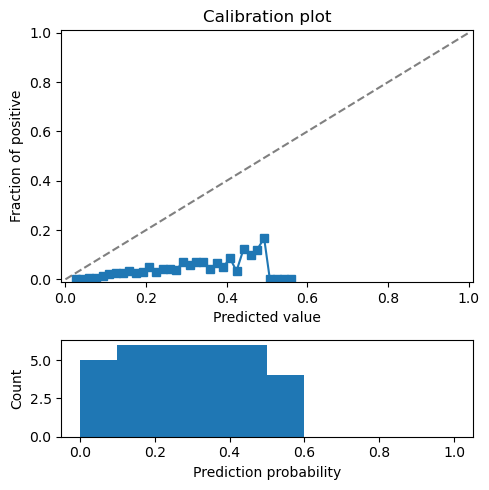

In [6]:
plotter(o01, x01)

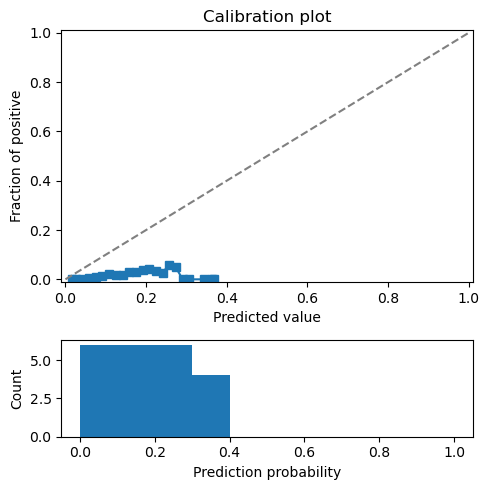

In [7]:
plotter(o02, x02)

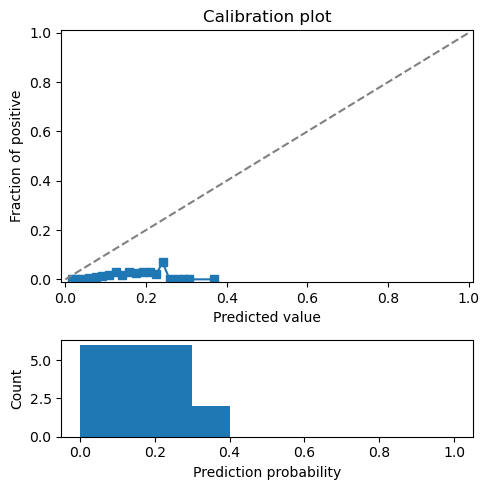

In [8]:
plotter(o03, x03)

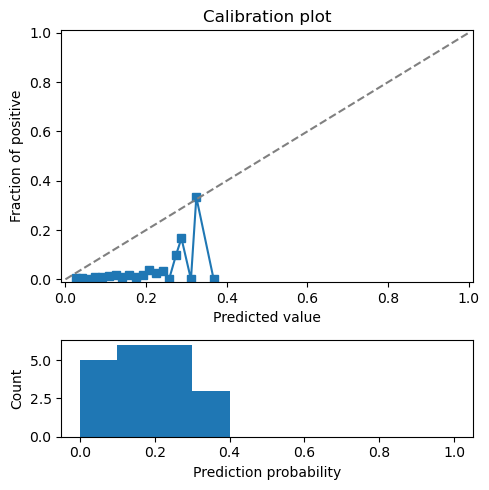

In [9]:
plotter(o04, x04)

In [65]:

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [66]:
tp_all =   np.concatenate((tp1,tp2, tp3, tp4)) 

(array([2.1511e+04, 1.4288e+04, 9.4320e+03, 4.9070e+03, 2.3770e+03,
        8.6900e+02, 2.0400e+02, 2.6000e+01, 4.0000e+00, 1.0000e+00]),
 array([0.01648482, 0.08067321, 0.1448616 , 0.20904999, 0.27323837,
        0.33742676, 0.40161515, 0.46580354, 0.52999193, 0.59418032,
        0.65836871]),
 <BarContainer object of 10 artists>)

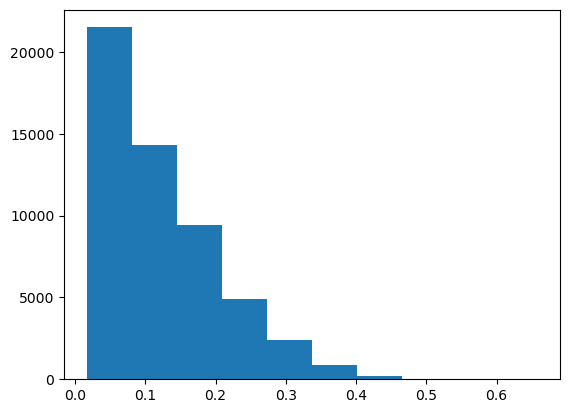

In [67]:
plt.hist(tp_all)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

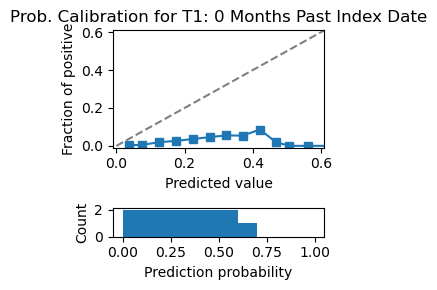

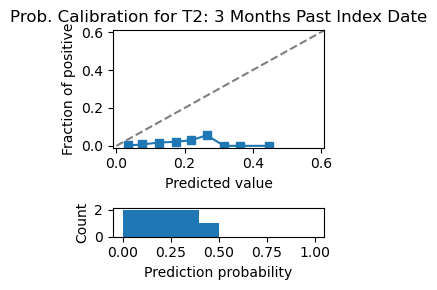

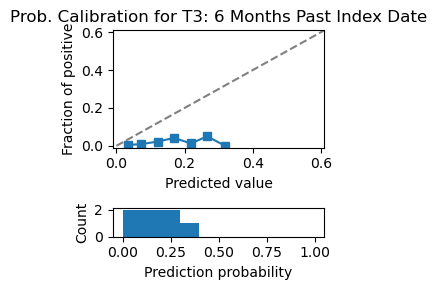

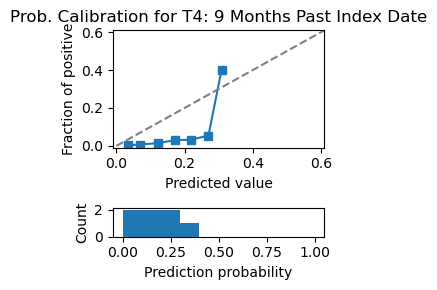

In [84]:
def plotter_b (p_i, y_i, name, max_=.61):
    plt.figure(figsize=(3, 3))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot(p_i, y_i, 's-')
    ax1.plot([0, 1], [0, 1], linestyle='--', 
             color='grey', label='random guess (AUROC: 0.500)')
    ax2.hist(p_i, bins=10, range=(0, 1))
    ax1.set_xlim([-0.01, max_])
    ax1.set_ylim([-0.01, max_])
    ax1.set_xlabel('Predicted value')
    ax1.set_ylabel('Fraction of positive')
    ax1.set_title(name)
    ax2.set_xlabel('Prediction probability')
    ax2.set_ylabel('Count')
    plt.tight_layout()
    return plt
    

plotter_b(p01, y01, "Prob. Calibration for T1: 0 Months Past Index Date")
plotter_b(p02, y02, "Prob. Calibration for T2: 3 Months Past Index Date")
plotter_b(p03, y03, "Prob. Calibration for T3: 6 Months Past Index Date")
plotter_b(p04, y04, "Prob. Calibration for T4: 9 Months Past Index Date")

In [11]:
np.mean(M_test1['golds'])

0.029331174492464814

In [12]:
( confusion_matrix (M_test1['golds'],  tp1> .064) )

array([[ 1590, 13997],
       [    3,   468]], dtype=int64)

In [13]:
( confusion_matrix (M_test2['golds'],  tp2>.064) )

array([[ 3205, 10747],
       [   11,   208]], dtype=int64)

In [15]:
( confusion_matrix (M_test3['golds'],  tp3>.064) )

array([[6056, 6530],
       [  30,  123]], dtype=int64)

In [16]:
( confusion_matrix (M_test4['golds'],  tp4>.064) )

array([[5723, 4832],
       [  18,   78]], dtype=int64)

In [113]:
# this is best so far,.default
wts01 = np.where(gold1 == 1, sum(gold1), 1)
wts02 = np.where(gold2 == 1, sum(gold2), 1)
wts03 = np.where(gold3 == 1, sum(gold3), 1)
wts04 = np.where(gold4 == 1, sum(gold4), 1)

In [117]:
np.mean(gold0)

0.019305812281782707

In [120]:
wts01 = np.where(gold1 == 1, 1/np.mean(gold0), 1)
wts02 = np.where(gold2 == 1, 2/np.mean(gold0), 2)
wts03 = np.where(gold3 == 1, 3/np.mean(gold0), 3)
wts04 = np.where(gold4 == 1, 4/np.mean(gold0), 4)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

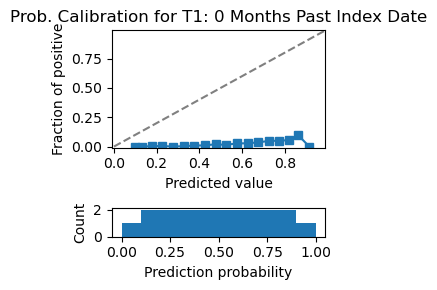

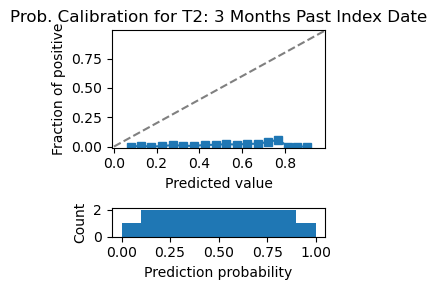

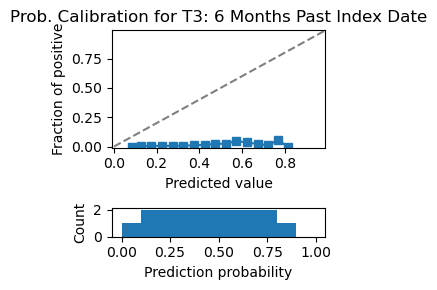

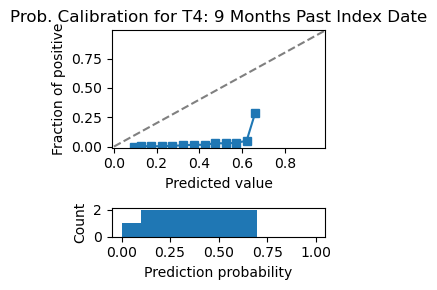

In [121]:
def each_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits ) *  t [0]  +t[1]
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  (test_logit )* alpha[0]  + alpha[1]
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

alpha_1  = each_scaling (  logit(mp1) , gold1,  wts01)
alpha_2  = each_scaling (  logit(mp2) , gold2,  wts02)
alpha_3  = each_scaling (  logit(mp3) , gold3,  wts03)
alpha_4  = each_scaling (  logit(mp4) , gold4,  wts04)


tcal_1 = temp_pred (alpha_1, logit(tp1) )
tcal_2 = temp_pred (alpha_2, logit(tp2) )
tcal_3 = temp_pred (alpha_3, logit(tp3) )
tcal_4 = temp_pred (alpha_4, logit(tp4) )

yy01, pp01 = calibration_curve(M_test1['golds'], tcal_1 , n_bins = 20)
yy02, pp02 = calibration_curve(M_test2['golds'], tcal_2 , n_bins = 20)
yy03, pp03 = calibration_curve(M_test3['golds'],tcal_3 , n_bins = 20)
yy04, pp04 = calibration_curve(M_test4['golds'], tcal_4, n_bins = 20)

plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)
plotter_b(pp02, yy02, "Prob. Calibration for T2: 3 Months Past Index Date", max_=.99)
plotter_b(pp03, yy03, "Prob. Calibration for T3: 6 Months Past Index Date", max_=.99)
plotter_b(pp04, yy04, "Prob. Calibration for T4: 9 Months Past Index Date", max_ = .99)

In [ ]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  /  t [0]  # +t[1]
        probs =  expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit / alpha[0]   #+ alpha[1]
    proba =  expit ( logi   )  
    return proba

In [ ]:
def temp_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))
    weights = np.where(subgold==1, wei ,1)

    #alpha =  temp_scaling ( (probs),subgold, weights )
    #temp_test = temp_pred(  alpha,    (p_test ))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit(p_test ))

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  temp_test)
    return temp_test

In [24]:
wts01 = np.where(gold1 == 1, 1/.064, 1)
wts02 = np.where(gold2 == 1, 1/.064, 2)
wts03 = np.where(gold3 == 1, 1/.064, 3)
wts04 = np.where(gold4 == 1, 1/.064, 4)

In [25]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [26]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [27]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit + alpha[1])/ alpha[0]     
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [28]:
alpha_t_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [29]:
pc = temp_pred2(alpha_t_1234, tlo1234 )

(array([26103., 10963.,  6840.,  4450.,  2760.,  1796.,  1117.,   628.,
          171.,    40.]),
 array([0.00420472, 0.0767673 , 0.14932988, 0.22189246, 0.29445504,
        0.36701762, 0.4395802 , 0.51214278, 0.58470536, 0.65726794,
        0.72983052]),
 <BarContainer object of 10 artists>)

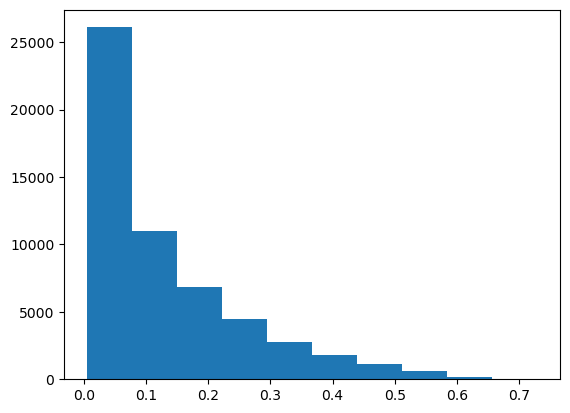

In [30]:
plt.hist(pc)

In [17]:
wp1 =  pc [tti==1]
wp2 =  pc [tti==2]
wp3 =  pc [tti==3]
wp4 =  pc [tti==4]

In [ ]:
plotter(p04, y04)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

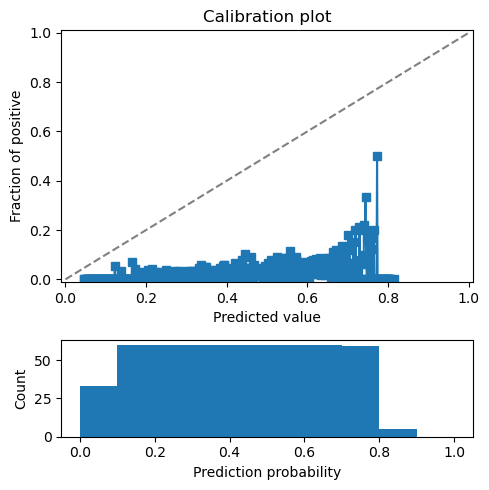

In [20]:
plotter(p01, y01)

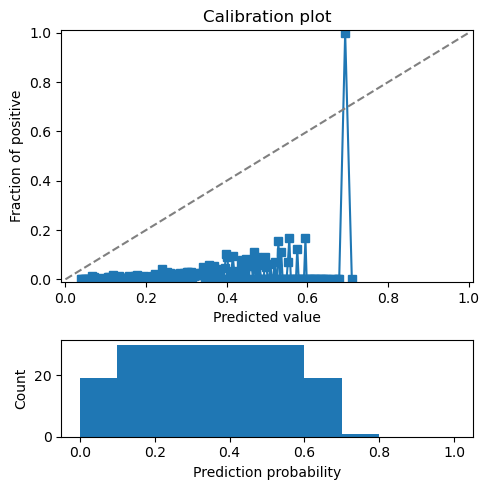

In [67]:
plotter(p03, y03)

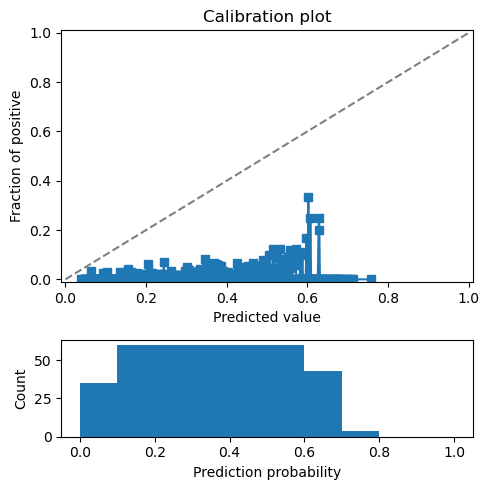

In [68]:
plotter(p02, y02)

In [69]:
import sklearn
from sklearn.metrics import confusion_matrix

In [70]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [71]:
[sklearn.metrics.roc_auc_score(tgold4,  wp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  wp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  wp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  wp1 , average = 'samples')]

[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [52]:
( confusion_matrix (tgold1,  wp1>.5) )

array([[11826,  3826],
       [  276,   204]], dtype=int64)

In [53]:
( confusion_matrix (tgold2,  wp2>.5) )

array([[13724,   282],
       [  212,     8]], dtype=int64)

In [54]:
( confusion_matrix (tgold3,  wp3>.5) )

array([[12585,    91],
       [  150,     3]], dtype=int64)

In [55]:
( confusion_matrix (tgold4,  wp4>.5) )

array([[11479,   101],
       [   94,     7]], dtype=int64)

In [ ]:
np1 =  (1-pc) [ti==1]
np2 =  (1-pc) [ti==2]
np3 =  (1-pc) [ti==3]
np4 =  (1-pc) [ti==4]

In [1534]:
wts1 = np.where(gold1 == 1, 1/( np1 *np.mean(gold1)), 1/ wp1)
wts2 = np.where(gold2 == 1, 1/( np2 *np.mean(gold2)), 2/ wp2)
wts3 = np.where(gold3 == 1, 1/( np3 *np.mean(gold3)), 3/wp3 )
wts4 = np.where(gold4 == 1, 1/( np4 *np.mean(gold4)), 4/wp4 )

In [1535]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        p1  = expit (t[0] + logi_1  )  
        p2  = expit ( t[0] + logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] + logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [1536]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [1537]:
tt['message']

'Optimization terminated successfully.'

In [1538]:
def temp_pred  ( j1,j2, test_logit):    
    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi + tt.x[0]  )  
    return proba

In [1539]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 600)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 600)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 300)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 200)



(array([8.046e+03, 1.778e+03, 7.560e+02, 4.660e+02, 2.560e+02, 1.890e+02,
        1.070e+02, 6.100e+01, 1.400e+01, 8.000e+00]),
 array([0.00265837, 0.07388229, 0.14510622, 0.21633014, 0.28755406,
        0.35877799, 0.43000191, 0.50122583, 0.57244975, 0.64367368,
        0.7148976 ]),
 <BarContainer object of 10 artists>)

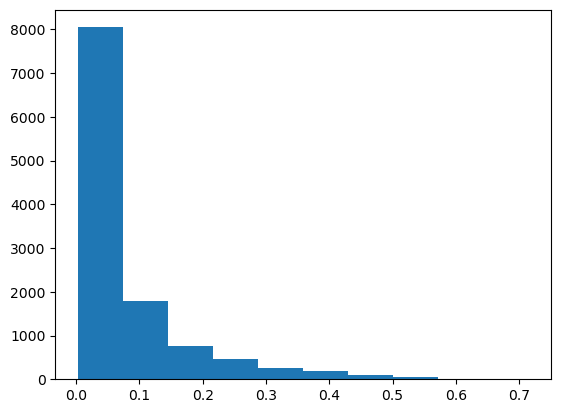

In [1540]:
plt.hist(cal_4)

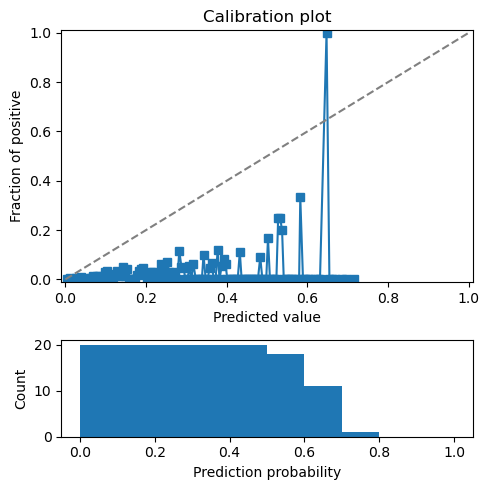

In [1541]:
plotter(p4, y4)

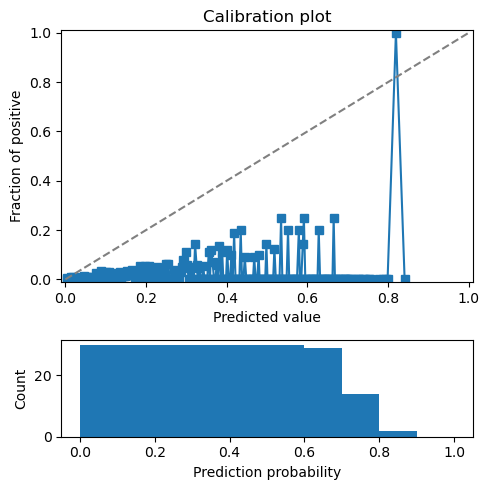

In [1542]:
plotter(p3, y3)


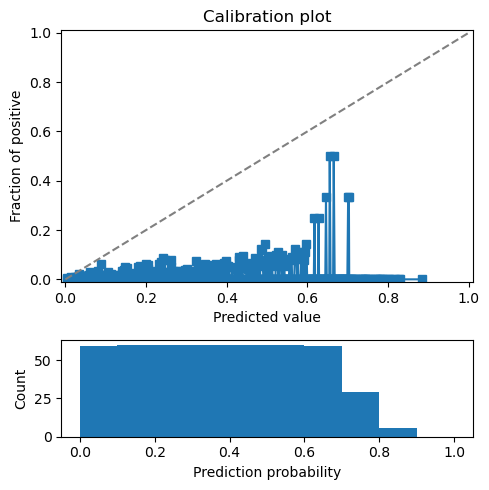

In [1543]:
plotter(p2, y2)

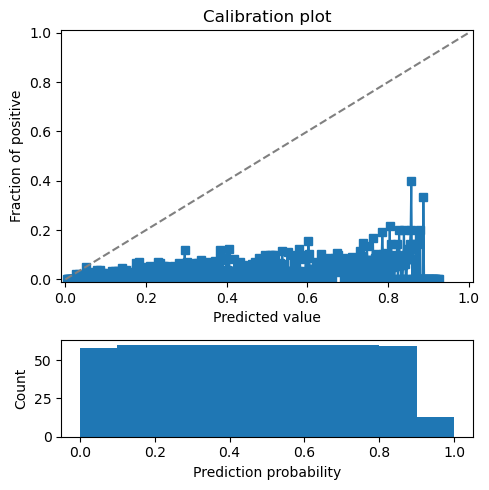

In [1544]:
plotter(p1, y1)

In [1028]:
temp4 = weighted_temp2_scaling_i(logit(mp4), gold4, wts4)

In [1029]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit   + alpha[1] )/ alpha[0]      
    proba = expit ( logi  )              #*tt.x[5]    
    return proba

In [1030]:
temp4

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6284422147144466
        x: [ 1.481e+00  1.620e+00]
      nit: 23
      jac: [-4.545e-07 -3.949e-07]
 hess_inv: [[ 4.646e+01 -2.643e+01]
            [-2.643e+01  2.481e+01]]
     nfev: 75
     njev: 25

In [1031]:
cal_4 = temp_pred2 ( temp4.x, logit(tp4) )


In [ ]:
tt5  = temperature_multi_5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [164]:
def temp_pred5  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit (  logi / tt.x[0]  )  
    return proba

In [20]:
import sklearn
from sklearn.metrics import confusion_matrix

In [224]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')


In [226]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[8111, 7408],
       [ 145,  361]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [8]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold0)* (1-mp1) **.5), 1/ mp1**.5)
wts02 = np.where(gold2 == 1, 1/(np.mean(gold0)* (1-mp2) **.5), 2/ mp2**.5)
wts03 = np.where(gold3 == 1, 1/(np.mean(gold0)* (1-mp3) **.5), 3/ mp3**.5)
wts04 = np.where(gold4 == 1, 1/(np.mean(gold0)* (1-mp4) **.5), 4/ mp4**.5)
